In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
# Ler o dataset original
data = pd.read_csv('original.csv')

### Distribuição do Dataset

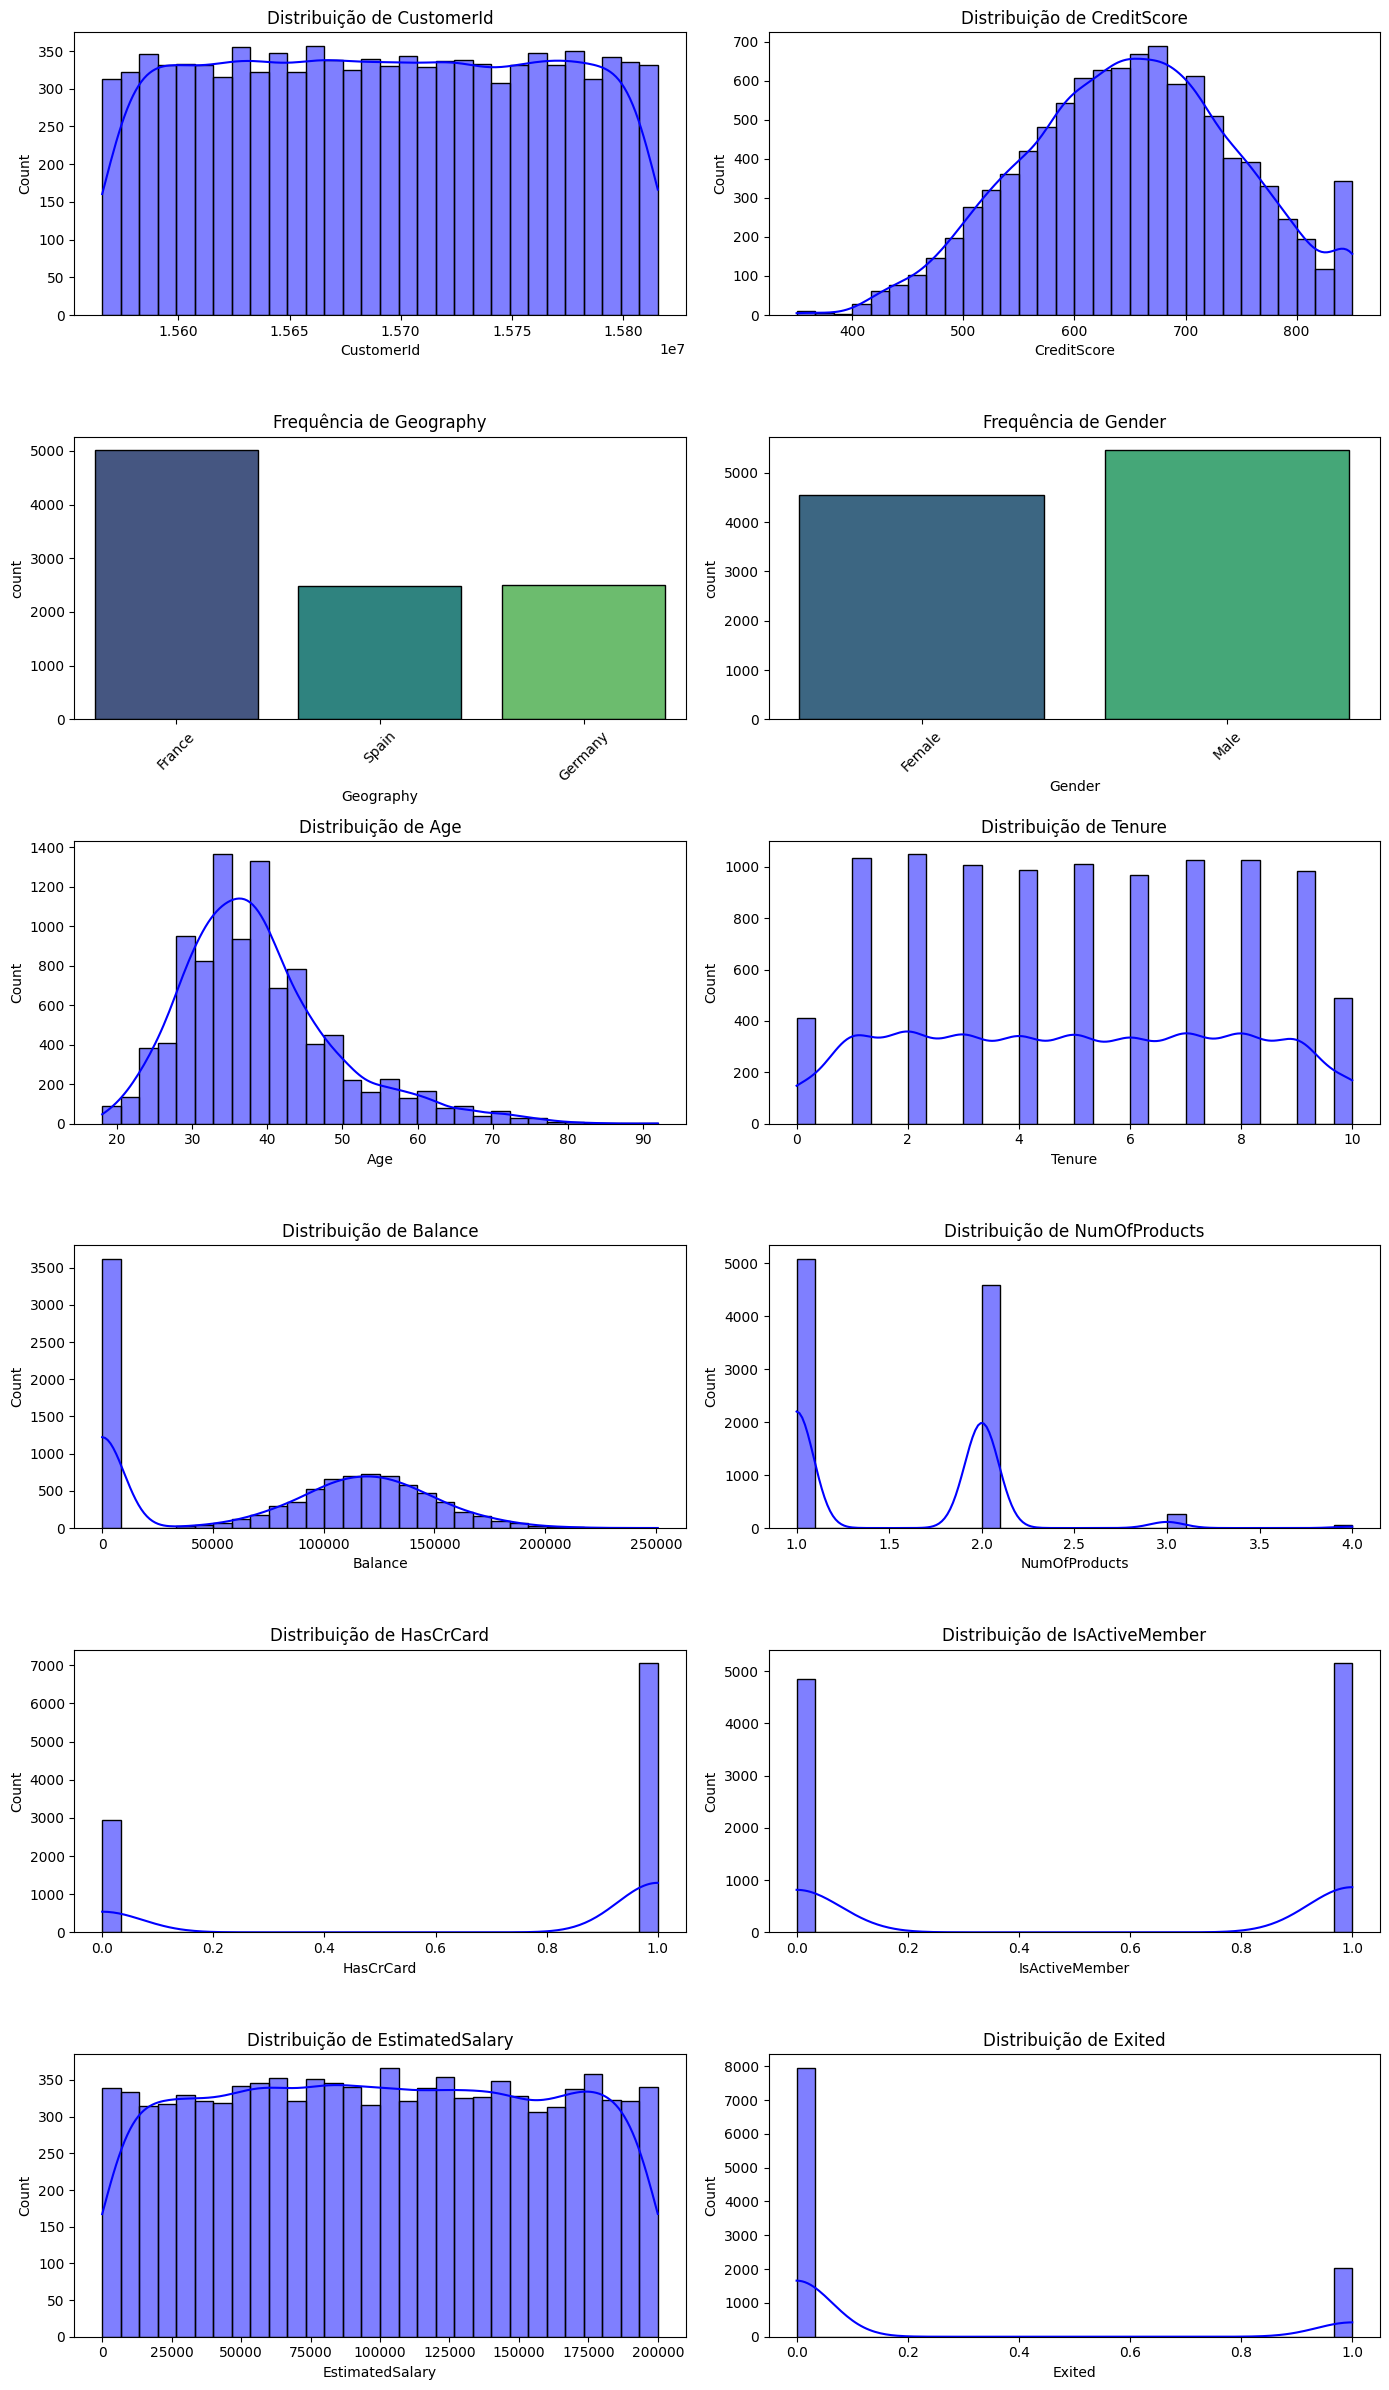

In [4]:
# Remover colunas que não queremos analisar
df = data.drop(columns=['RowNumber', 'Surname'])
columns = df.columns
num_plots = len(columns)

# Criar subplots com 2 colunas por linha
ncols = 2
nrows = (num_plots + 1) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, nrows * 4))
axes = axes.flatten()

# Gerar gráficos para cada coluna
for i, col in enumerate(columns):
    if df[col].dtype in ['int64', 'float64']:
        sns.histplot(df[col], bins=30, kde=True, ax=axes[i], color='blue', edgecolor='black')
        axes[i].set_title(f'Distribuição de {col}')
    else:
        sns.countplot(x=df[col], ax=axes[i], palette='viridis', edgecolor='black')
        axes[i].set_title(f'Frequência de {col}')
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

### Qualidade e Conformidade dos Dados

Nas células de código desta secção, pretende-se procurar e identificar erros nos dados, sejam valores em falta, sejam erros de codificação ou medição, sejam inconsistências, entre outros.

In [5]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Conforme é possível verificar através do código executado, o *dataset* não contem valores nulos nem N/A, pelo que não existem valores em falta.

In [7]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [8]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [9]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [10]:
data['HasCrCard'].unique()

array([1, 0], dtype=int64)

In [11]:
data['IsActiveMember'].unique()

array([1, 0], dtype=int64)

In [12]:
data['Exited'].unique()

array([1, 0], dtype=int64)

In [13]:
print(sorted(data['NumOfProducts'].unique()))

[1, 2, 3, 4]


In [14]:
print(sorted(data['Tenure'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [15]:
# Verificar o número de linhas duplicadas
num_duplicados = data.duplicated().sum()

print(f"Número de registos duplicadas no dataset: {num_duplicados}")

Número de registos duplicadas no dataset: 0


Através da descrição dos dados anteriormente efetuada e da análise de valores únicos em cada coluna, também é possível constatar que:
* O intervalo de valores para as pontuações de crédito, [350, 850];
* Os valores dos atributos *Tenure* e *NumOfProducts*, ao variarem, respetivamente, de 0 a 10 e de 1 a 4, são todos plausíveis;
* As colunas categóricas não contêm erros de codificação, dado que *Geography* só toma os valores "France", "Spain" e "Germany", enquanto *Gender* só é "Male" ou "Female";
* Os atributos binários assumem unicamente os valores 0 e 1, tal como esperado;
* Não existem registos duplicados, ou seja, cada cliente só aparece uma vez no *dataset*.

Tudo isto indica que não existem erros de medição nem inconsistências de valores/codificação nos dados constantes do *dataset* original.

### Objetivo da Divulgação do Dataset

In [16]:
print("Idade mínima:", min(data['Age']))
print("Idade máxima:", max(data['Age']))

Idade mínima: 18
Idade máxima: 92


In [17]:
# Definir intervalos de idade
bins_age = list(range(18, 100, 10))
labels_age = [f"{bins_age[i]} - {bins_age[i+1]}" for i in range(len(bins_age)-1)]
data["Age_Range"] = pd.cut(data["Age"], bins=bins_age, labels=labels_age, include_lowest=True)

# Calcular a média do salário por intervalo de idade
stats_age = data.groupby("Age_Range").agg({
    "EstimatedSalary": "mean"
}).reset_index()

stats_age.rename(columns={
    "EstimatedSalary": "Média dos Salários"
}, inplace=True)

print(stats_age)
data.drop(columns=["Age_Range"], inplace=True)

  Age_Range  Média dos Salários
0   18 - 28       100773.335159
1   28 - 38        99159.351210
2   38 - 48       101973.403760
3   48 - 58        99008.910524
4   58 - 68        97499.930554
5   68 - 78        96686.750325
6   78 - 88       114419.103529
7   88 - 98       115000.410000


In [ ]:

# Definir os intervalos de idade (ajusta conforme necessário)
bins = [0, 18, 25, 35, 45, 60, 100]
labels = ['18-24', '25-34', '35-44', '45-59', '60+']

# Criar uma nova coluna com os grupos etários
data['faixa_etaria'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Contar quantos registros há por intervalo
contagem = data['faixa_etaria'].value_counts().sort_index()

# Mostrar o resultado
print("Contagem de registos por intervalo de idades:")
print(contagem)

Contagem de registos por intervalo de idades:
faixa_etaria
0-17        0
18-24     457
25-34    3222
35-44    3981
45-59    1814
60+       526
Name: count, dtype: int64
